In [1]:
import pandas_datareader as wb, pandas as pd, datetime, matplotlib.pyplot as plt, numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 5, 17)
df_null = wb.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

### Conditional Heteroscedastic Models

The univariate volatility models discussed in this chapter include the autoregres- sive conditional heteroscedastic (ARCH) model of Engle (1982), the generalized ARCH (GARCH) model of Bollerslev (1986), the exponential GARCH (EGARCH) model of Nelson (1991), the threshold GARCH (TGARCH) model of Glosten, Jagannathan, and Runkle (1993) and Zakoian (1994), the conditional heteroscedas- tic autoregressive moving-average (CHARMA) model of Tsay (1987), the random coefficient autoregressive (RCA) model of Nicholls and Quinn (1982), and the stochastic volatility (SV) models of Melino and Turnbull (1990), Taylor (1994), Harvey, Ruiz, and Shephard (1994), and Jacquier, Polson, and Rossi (1994). We also discuss advantages and weaknesses of each volatility model and show some applications of the models. Multivariate volatility models, including those with time-varying correlations, are discussed in Chapter 10.

#### 1. Characteristics of Vaolatility

The resulting value of σt is called the implied volatility of the underlying stock. However, this implied volatility is derived under the assumption that the price of the underlying asset follows a geometric Brownian motion. It might be different from the actual volatility. Experience shows that implied volatility of an asset return tends to be larger than that obtained by using a GARCH type of volatility model. This might be due to the risk premium for volatility or to the way daily returns are calculated. The VIX of CBOE is an implied volatility.

**Some characteristics of volatilities**
- there exist volatility clusters
- volatility evolves over time in a continuous manner
- volatility does not diverge to infinity
- volatility seems to react differently to a big price increase or a big price drop, referred to as the leverage effect

#### 2. Structure of a Model

To put the volatility models in proper perspective, it is informative to consider the conditional mean and variance of $r_t$ given $F_{t−1}$

$$\mu_t = E(r_t|F_{t-1}), ~~~~~ \sigma_t^2 = \mathrm{Var}(r_t|F_{t-1}) = E[(r_t - \mu_t)^2|F_{t-1}]$$

where $F_{t−1}$ denotes the information set available at time $t − 1$. we assume that rt follows a simple time series model such as a stationary $\mathrm{ARMA}(p, q)$ model with some explanatory variables. In other words, we entertain the model

$$r_t = \mu_t + a_t, ~~~ \mu_t = \sum_{i=1}^p \phi _i y_{t-i} - \sum_{i=1}^q \theta_i a_{t-i}, ~~~~ y_t = r_t - \phi_0 - \sum_{i=1}^k \beta_i x_{it}$$

In [6]:
ret = np.log(df) - np.log(df.shift())
ret = ret.dropna()
ret

Date
2010-01-05   -0.003260
2010-01-06    0.008657
2010-01-07   -0.012908
2010-01-08    0.006991
2010-01-11   -0.000673
                ...   
2023-05-11   -0.002210
2023-05-12   -0.006274
2023-05-15    0.001586
2023-05-16    0.000359
2023-05-17    0.005797
Name: Close, Length: 3300, dtype: float64

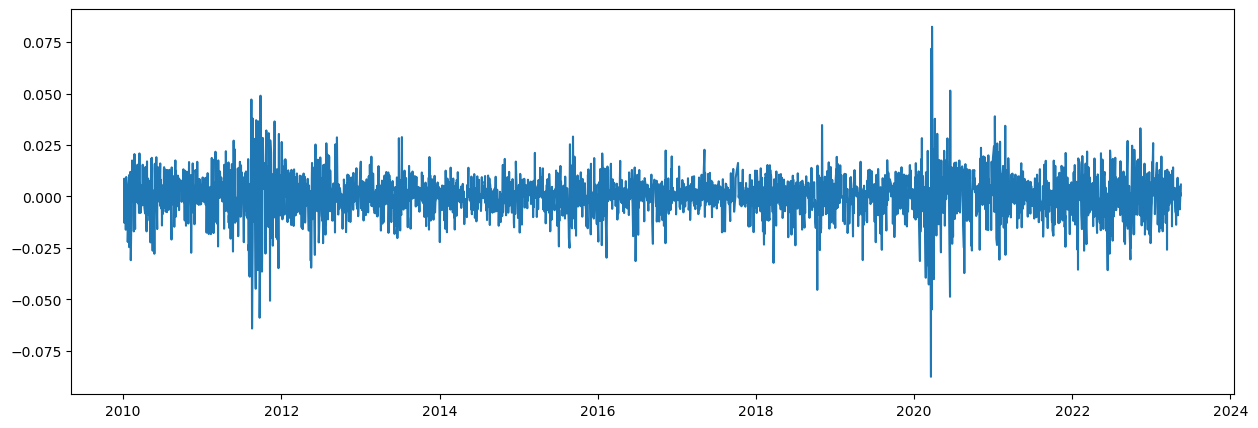

In [8]:
plt.style.use('default')
plt.figure(figsize = (15,5))
plt.plot(ret)